In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random
import seaborn as sns
import requests
import json
import plotly as pio
import plotly.express as px
import kaleido as kl
pd.set_option('display.max_columns', 50)

In [2]:
euro = "data/Euro_6_CLEAN.csv"
euro_df = pd.read_csv(euro, encoding='ANSI')
euro_df

Manufacturer       Model                                 Description  \
0          ABARTH         595                             1.4 TJET 145bhp   
1          ABARTH         595                             1.4 TJET 145bhp   
2          ABARTH         595                            595 1.4 145 BHP    
3          ABARTH         595                             595 1.4 145 BHP   
4          ABARTH         595                 595 1.4 145 BHP Convertible   
...           ...         ...                                         ...   
6329        VOLVO  XC90, MY22  Recharge T8 Plug-in Hybrid Inscription Pro   
6330        VOLVO  XC90, MY22         Recharge T8 Plug-in Hybrid R-Design   
6331        VOLVO  XC90, MY22         Recharge T8 Plug-in Hybrid R-Design   
6332        VOLVO  XC90, MY22     Recharge T8 Plug-in Hybrid R-Design Pro   
6333        VOLVO  XC90, MY22     Recharge T8 Plug-in Hybrid R-Design Pro   

     Transmission Manual or Automatic  Engine Capacity             Fuel Type  \
0              M5              Manual           1368.0                Petrol   
1              M5              Manual           1368.0                Petrol   
2              M5              Manual           1368.0                Petrol   
3              M5              Manual           1368.0                Petrol   
4              M5              Manual           1368.0                Petrol   
...           ...                 ...              ...                   ...   
6329       8A-AWD           Automatic           1969.0  Electricity / Petrol   
6330       8A-AWD           Automatic           1969.0  Electricity / Petrol   
6331       8A-AWD           Automatic           1969.0  Electricity / Petrol   
6332       8A-AWD           Automatic           1969.0  Electricity / Petrol   
6333       8A-AWD           Automatic           1969.0  Electricity / Petrol   

                                  Powertrain  Engine Power (PS)  \
0           Internal Combustion Engine (ICE)              145.0   
1           Internal Combustion Engine (ICE)              145.0   
2           Internal Combustion Engine (ICE)              145.0   
3           Internal Combustion Engine (ICE)              145.0   
4           Internal Combustion Engine (ICE)              145.0   
...                                      ...                ...   
6329  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   
6330  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   
6331  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   
6332  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   
6333  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   

      Engine Power (Kw)  Electric energy consumption Miles/kWh  wh/km  \
0                 107.0                                    0.0    NaN   
1                 107.0                                    0.0    NaN   
2                 107.0                                    0.0    NaN   
3                 107.0                                    0.0    NaN   
4                 107.0                                    0.0    NaN   
...                 ...                                    ...    ...   
6329              288.0                                    2.4  254.0   
6330              288.0                                    2.4  254.0   
6331              288.0                                    2.4  254.0   
6332              288.0                                    2.5  241.0   
6333              288.0                                    2.5  241.0   

      Maximum range (Km)  Maximum range (Miles) Euro Standard  \
0                    NaN                    NaN       Euro 6d   
1                    NaN                    NaN       Euro 6d   
2                    NaN                    NaN  Euro 6d-TEMP   
3                    NaN                    NaN  Euro 6d-TEMP   
4                    NaN                    NaN  Euro 6d-TEMP   
...                  ...                    ...

# 

# How have electric vehicles varied as a proportion of models of car?

In [3]:
# Pie Chart formatting
colors = ["red", "orange", "lightcoral", "lightskyblue", "purple", "pink","green", "yellow"]

explode = (0.1, 0, 0, 0.1, 0.1, 0.1, 1, 1)

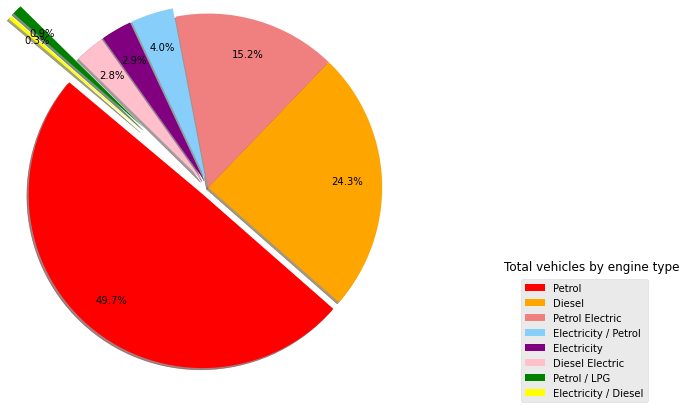

In [63]:
counts = euro_df["Fuel Type"].value_counts()
plt.pie(counts.values, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, radius=2, pctdistance = 0.8)

plt.style.use("ggplot")
plt.legend(bbox_to_anchor= (1.02,1), loc="upper left", borderaxespad=20,labels=counts.index.values)
plt.suptitle('Total vehicles by engine type', x= 1.4, y=0.25)

plt.savefig(fname="images/pie chart total")


In [5]:
# checking Date of change type
euro_df.dtypes

Manufacturer                              object
Model                                     object
Description                               object
Transmission                              object
Manual or Automatic                       object
Engine Capacity                          float64
Fuel Type                                 object
Powertrain                                object
Engine Power (PS)                        float64
Engine Power (Kw)                        float64
Electric energy consumption Miles/kWh    float64
wh/km                                    float64
Maximum range (Km)                       float64
Maximum range (Miles)                    float64
Euro Standard                             object
Diesel VED Supplement                       bool
Testing Scheme                            object
WLTP Imperial Low                        float64
WLTP Imperial Medium                     float64
WLTP Imperial High                       float64
WLTP Imperial Extra 

In [6]:
#Converting the 'Date of change' coulmn from object to datetime
euro_df["Date of change"] = pd.to_datetime(euro_df["Date of change"])
print (euro_df.dtypes)

Manufacturer                                     object
Model                                            object
Description                                      object
Transmission                                     object
Manual or Automatic                              object
Engine Capacity                                 float64
Fuel Type                                        object
Powertrain                                       object
Engine Power (PS)                               float64
Engine Power (Kw)                               float64
Electric energy consumption Miles/kWh           float64
wh/km                                           float64
Maximum range (Km)                              float64
Maximum range (Miles)                           float64
Euro Standard                                    object
Diesel VED Supplement                              bool
Testing Scheme                                   object
WLTP Imperial Low                               

In [7]:
#Adding a 'year of change column' to showcase the years 
euro_df ["year_of_change"] = euro_df['Date of change'].dt.year
euro_df

Manufacturer       Model                                 Description  \
0          ABARTH         595                             1.4 TJET 145bhp   
1          ABARTH         595                             1.4 TJET 145bhp   
2          ABARTH         595                            595 1.4 145 BHP    
3          ABARTH         595                             595 1.4 145 BHP   
4          ABARTH         595                 595 1.4 145 BHP Convertible   
...           ...         ...                                         ...   
6329        VOLVO  XC90, MY22  Recharge T8 Plug-in Hybrid Inscription Pro   
6330        VOLVO  XC90, MY22         Recharge T8 Plug-in Hybrid R-Design   
6331        VOLVO  XC90, MY22         Recharge T8 Plug-in Hybrid R-Design   
6332        VOLVO  XC90, MY22     Recharge T8 Plug-in Hybrid R-Design Pro   
6333        VOLVO  XC90, MY22     Recharge T8 Plug-in Hybrid R-Design Pro   

     Transmission Manual or Automatic  Engine Capacity             Fuel Type  \
0              M5              Manual           1368.0                Petrol   
1              M5              Manual           1368.0                Petrol   
2              M5              Manual           1368.0                Petrol   
3              M5              Manual           1368.0                Petrol   
4              M5              Manual           1368.0                Petrol   
...           ...                 ...              ...                   ...   
6329       8A-AWD           Automatic           1969.0  Electricity / Petrol   
6330       8A-AWD           Automatic           1969.0  Electricity / Petrol   
6331       8A-AWD           Automatic           1969.0  Electricity / Petrol   
6332       8A-AWD           Automatic           1969.0  Electricity / Petrol   
6333       8A-AWD           Automatic           1969.0  Electricity / Petrol   

                                  Powertrain  Engine Power (PS)  \
0           Internal Combustion Engine (ICE)              145.0   
1           Internal Combustion Engine (ICE)              145.0   
2           Internal Combustion Engine (ICE)              145.0   
3           Internal Combustion Engine (ICE)              145.0   
4           Internal Combustion Engine (ICE)              145.0   
...                                      ...                ...   
6329  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   
6330  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   
6331  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   
6332  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   
6333  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   

      Engine Power (Kw)  Electric energy consumption Miles/kWh  wh/km  \
0                 107.0                                    0.0    NaN   
1                 107.0                                    0.0    NaN   
2                 107.0                                    0.0    NaN   
3                 107.0                                    0.0    NaN   
4                 107.0                                    0.0    NaN   
...                 ...                                    ...    ...   
6329              288.0                                    2.4  254.0   
6330              288.0                                    2.4  254.0   
6331              288.0                                    2.4  254.0   
6332              288.0                                    2.5  241.0   
6333              288.0                                    2.5  241.0   

      Maximum range (Km)  Maximum range (Miles) Euro Standard  \
0                    NaN                    NaN       Euro 6d   
1                    NaN                    NaN       Euro 6d   
2                    NaN                    NaN  Euro 6d-TEMP   
3                    NaN                    NaN  Euro 6d-TEMP   
4                    NaN                    NaN  Euro 6d-TEMP   
...                  ...                    ...

In [8]:
#Filtering the year of change coulumn by 2019
Filtered_df_2019 = euro_df[euro_df.year_of_change == 2019]
Filtered_df_2019.head()


Manufacturer                            Model  Description  \
180  ASTON MARTIN LAGONDA      DB11 V12 AMR Coupe 2019.5MY        Coupe   
181  ASTON MARTIN LAGONDA           DB11 V8 Coupe 2019.5MY        Coupe   
182  ASTON MARTIN LAGONDA         DB11 V8 Volante 2019.5MY  Convertible   
183  ASTON MARTIN LAGONDA          DBS Superleggera 2019MY        Coupe   
186  ASTON MARTIN LAGONDA  DBS Superleggera Volante 2020MY  Convertible   

    Transmission Manual or Automatic  Engine Capacity Fuel Type  \
180           A8           Automatic           5204.0    Petrol   
181           A8           Automatic           3982.0    Petrol   
182           A8           Automatic           3982.0    Petrol   
183           A8           Automatic           5204.0    Petrol   
186           A8           Automatic           5204.0    Petrol   

                           Powertrain  Engine Power (PS)  Engine Power (Kw)  \
180  Internal Combustion Engine (ICE)              630.0              470.0   
181  Internal Combustion Engine (ICE)              503.0              375.0   
182  Internal Combustion Engine (ICE)              503.0              375.0   
183  Internal Combustion Engine (ICE)              715.0              533.0   
186  Internal Combustion Engine (ICE)              715.0              533.0   

     Electric energy consumption Miles/kWh  wh/km  Maximum range (Km)  \
180                                    0.0    NaN                 NaN   
181                                    0.0    NaN                 NaN   
182                                    0.0    NaN                 NaN   
183                                    0.0    NaN                 NaN   
186                                    0.0    NaN                 NaN   

     Maximum range (Miles) Euro Standard  Diesel VED Supplement  \
180                    NaN  Euro 6d-TEMP                  False   
181                    NaN  Euro 6d-TEMP                  False   
182                    NaN  Euro 6d-TEMP                  False   
183                    NaN  Euro 6d-TEMP                  False   
186                    NaN       Euro 6d                  False   

    Testing Scheme  WLTP Imperial Low  WLTP Imperial Medium  \
180           WLTP               11.9                  21.5   
181           WLTP               16.3                  25.5   
182           WLTP               13.8                  23.4   
183           WLTP               11.7                  20.8   
186           WLTP               12.2                  21.0   

     WLTP Imperial High  WLTP Imperial Extra High  WLTP Imperial Combined  \
180                25.5                      24.4                    21.1   
181                31.1                      29.6                    26.3   
182                30.2                      28.5                    24.4   
183                25.1                      24.6                    20.9   
186                25.0                      24.1                    21.0   

     WLTP Imperial Combined (Weighted)  WLTP Metric Low  WLTP Metric Medium  \
180                                0.0             23.7                13.1   
181                                0.0             17.4                11.1   
182                                0.0             20.4                12.1   
183                                0.0             24.1                13.6   
186                                0.0             23.2                13.5   

     WLTP Metric High  WLTP Metric Extra High  WLTP Metric Combined  \
180              11.1                    11.6                  13.4   
181               9.1                     9.6                  10.8   
182               9.4                     9.9                  11.6   
183              11.2                    11.5                  13.5   
186              11.3                    11.7                  13.5   

     WLTP Metric Combined (Weighted)  WLTP CO2  WLTP CO2 Weighted  \
180                          

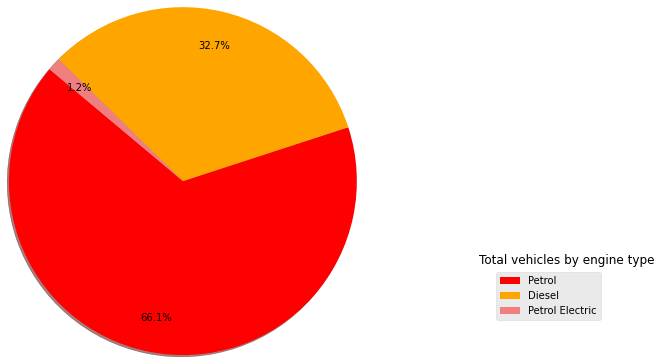

In [64]:
#Plotting a pie chart based on the fuel type popularity in 2019
colors1 = ["red", "orange", "lightcoral"]
counts1 = Filtered_df_2019["Fuel Type"].value_counts()
plt.pie(counts1.values, explode=None, colors=colors1, autopct='%1.1f%%', shadow=True, startangle=140, radius=2, pctdistance = 0.8)

plt.style.use("ggplot")
plt.legend(bbox_to_anchor= (1.02,1), loc="upper left", borderaxespad=20,labels=counts1.index.values)
plt.suptitle('Total vehicles by engine type 2019', x= 1.4, y=0.25)

plt.savefig(fname="images/pie chart 2019")

In [10]:
#Filtering the year of change coulumn by 2020
Filtered_df_2020 = euro_df[euro_df.year_of_change == 2020]
Filtered_df_2020.head()

Manufacturer Model                         Description Transmission  \
2       ABARTH   595                    595 1.4 145 BHP            M5   
3       ABARTH   595                     595 1.4 145 BHP           M5   
6       ABARTH   595               595 1.4 TJET 145 BHP            M5   
7       ABARTH   595                595 1.4 TJET 145 BHP           M5   
8       ABARTH   595  595 Competizione 180 BHP Hatchback           M5   

  Manual or Automatic  Engine Capacity Fuel Type  \
2              Manual           1368.0    Petrol   
3              Manual           1368.0    Petrol   
6              Manual           1368.0    Petrol   
7              Manual           1368.0    Petrol   
8              Manual           1368.0    Petrol   

                         Powertrain  Engine Power (PS)  Engine Power (Kw)  \
2  Internal Combustion Engine (ICE)              145.0              107.0   
3  Internal Combustion Engine (ICE)              145.0              107.0   
6  Internal Combustion Engine (ICE)              145.0              107.0   
7  Internal Combustion Engine (ICE)              145.0              107.0   
8  Internal Combustion Engine (ICE)              180.0              132.0   

   Electric energy consumption Miles/kWh  wh/km  Maximum range (Km)  \
2                                    0.0    NaN                 NaN   
3                                    0.0    NaN                 NaN   
6                                    0.0    NaN                 NaN   
7                                    0.0    NaN                 NaN   
8                                    0.0    NaN                 NaN   

   Maximum range (Miles) Euro Standard  Diesel VED Supplement Testing Scheme  \
2                    NaN  Euro 6d-TEMP                  False           WLTP   
3                    NaN  Euro 6d-TEMP                  False           WLTP   
6                    NaN  Euro 6d-TEMP                  False           WLTP   
7                    NaN  Euro 6d-TEMP                  False           WLTP   
8                    NaN  Euro 6d-TEMP                  False           WLTP   

   WLTP Imperial Low  WLTP Imperial Medium  WLTP Imperial High  \
2               27.2                  42.8                43.4   
3               27.4                  42.2                47.1   
6               27.2                  42.8                43.4   
7               27.4                  42.2                47.1   
8               26.2                  39.8                44.1   

   WLTP Imperial Extra High  WLTP Imperial Combined  \
2                      34.4                    37.2   
3                      38.7                    39.2   
6                      34.4                    37.2   
7                      38.7                    39.2   
8                      34.9                    36.7   

   WLTP Imperial Combined (Weighted)  WLTP Metric Low  WLTP Metric Medium  \
2                                0.0             10.4                 6.6   
3                                0.0             10.3                 6.7   
6                                0.0             10.4                 6.6   
7                                0.0             10.3                 6.7   
8                                0.0             10.8                 7.1   

   WLTP Metric High  WLTP Metric Extra High  WLTP Metric Combined  \
2               6.5                     8.2                   7.6   
3               6.0                     7.3                   7.2   
6               6.5                     8.2                   7.6   
7               6.0                     7.3                   7.2   
8               6.4                     8.1                   7.7   

   WLTP Metric Combined (Weighted)  WLTP CO2  WLTP CO2 Weighted  \
2                              0.0     169.0                0.0   
3                              0.0     162.0                0.0   
6                              0.0     169.0                0.0   
7    

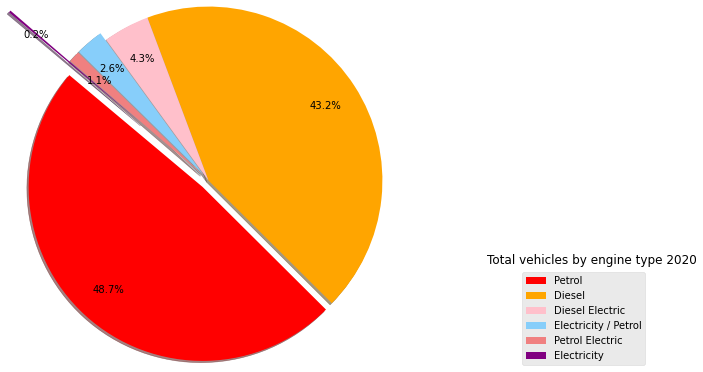

In [66]:
#Plotting a pie chart based on the fuel type popularity in 2020
colors2 = ["red", "orange", "pink", "lightskyblue", "lightcoral", "purple"]
explode1=(0.1, 0, 0, 0.1, 0.1, 1,)
counts2 = Filtered_df_2020["Fuel Type"].value_counts()
plt.pie(counts2.values, explode=explode1, colors=colors2, autopct='%1.1f%%', shadow=True, startangle=140, radius=2, pctdistance = 0.8)

plt.style.use("ggplot")
plt.legend(bbox_to_anchor= (1.02,1), loc="upper left", borderaxespad=20, labels=counts2.index.values)
plt.suptitle('Total vehicles by engine type 2020', x= 1.4, y=0.25)

plt.savefig(fname="images/pie chart 2020") 

In [12]:
#Filtering the year of change coulumn by 2021
Filtered_df_2021 = euro_df[euro_df.year_of_change == 2021]
Filtered_df_2021.head()

Manufacturer    Model                                     Description  \
4         ABARTH      595                     595 1.4 145 BHP Convertible   
5         ABARTH      595                     595 1.4 145 BHP Convertible   
12        ABARTH      595   595 Competizione 1.4 TJET 180 BHP Convertible   
13        ABARTH      595  595 Comperizione 1.4 TJET 180 BHP Convertible    
110   ALFA ROMEO  Stelvio       2.0 Turbo petrol 280hp AWD VELOCE (206kw)   

    Transmission Manual or Automatic  Engine Capacity Fuel Type  \
4             M5              Manual           1368.0    Petrol   
5             M5              Manual           1368.0    Petrol   
12            M5              Manual           1368.0    Petrol   
13          SAT5           Automatic           1368.0    Petrol   
110           A8           Automatic           1995.0    Petrol   

                           Powertrain  Engine Power (PS)  Engine Power (Kw)  \
4    Internal Combustion Engine (ICE)              145.0              107.0   
5    Internal Combustion Engine (ICE)              145.0              107.0   
12   Internal Combustion Engine (ICE)              180.0              132.0   
13   Internal Combustion Engine (ICE)              180.0              132.0   
110  Internal Combustion Engine (ICE)              280.0              206.0   

     Electric energy consumption Miles/kWh  wh/km  Maximum range (Km)  \
4                                      0.0    NaN                 NaN   
5                                      0.0    NaN                 NaN   
12                                     0.0    NaN                 NaN   
13                                     0.0    NaN                 NaN   
110                                    0.0    NaN                 NaN   

     Maximum range (Miles) Euro Standard  Diesel VED Supplement  \
4                      NaN  Euro 6d-TEMP                  False   
5                      NaN  Euro 6d-TEMP                  False   
12                     NaN  Euro 6d-TEMP                  False   
13                     NaN  Euro 6d-TEMP                  False   
110                    NaN  Euro 6d-TEMP                  False   

    Testing Scheme  WLTP Imperial Low  WLTP Imperial Medium  \
4             WLTP               27.2                  42.8   
5             WLTP               27.4                  42.2   
12            WLTP               26.2                  39.8   
13            WLTP               28.5                  38.2   
110           WLTP               21.1                  29.1   

     WLTP Imperial High  WLTP Imperial Extra High  WLTP Imperial Combined  \
4                  43.5                      34.4                    37.2   
5                  47.1                      38.7                    39.2   
12                 44.1                      34.9                    36.7   
13                 42.8                      34.9                    36.2   
110                34.4                      29.7                    29.1   

     WLTP Imperial Combined (Weighted)  WLTP Metric Low  WLTP Metric Medium  \
4                                  0.0             10.4                 6.6   
5                                  0.0             10.3                 6.7   
12                                 0.0             10.8                 7.1   
13                                 0.0              9.9                 7.4   
110                                0.0             13.4                 9.7   

     WLTP Metric High  WLTP Metric Extra High  WLTP Metric Combined  \
4                 6.5                     8.2                   7.6   
5                 6.0                     7.3                   7.2   
12                6.4                     8.1                   7.7   
13                6.6                     8.1                   7.8   
110               8.2                     9.5                   9.7   

     WLTP Metric Combined (Weighted)  WLTP CO2  WLTP CO2 Weighted  \
4       

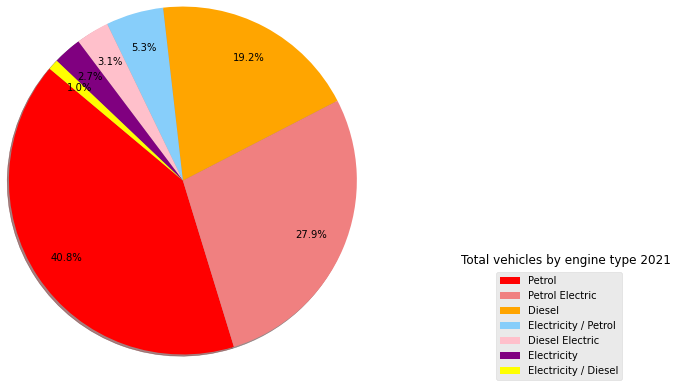

In [67]:
#Plotting a pie chart based on the fuel type popularity in 2021
colors3 = ["red","lightcoral", "orange","lightskyblue","pink", "purple", "yellow"]
counts3 = Filtered_df_2021["Fuel Type"].value_counts()
plt.pie(counts3.values,explode=None, colors=colors3, autopct='%1.1f%%', shadow=True, startangle=140, radius=2, pctdistance = 0.8)

plt.style.use("ggplot")
plt.legend(bbox_to_anchor= (1.02,1), loc="upper left", borderaxespad=20, labels=counts3.index.values)
plt.suptitle('Total vehicles by engine type 2021', x= 1.4, y=0.25)

plt.savefig(fname="images/pie chart 2021")

In [14]:
#Filtering the year of change coulumn by 2022
Filtered_df_2022 = euro_df[euro_df.year_of_change == 2022]
Filtered_df_2022.head()

Manufacturer Model                   Description Transmission  \
0        ABARTH   595               1.4 TJET 145bhp           M5   
1        ABARTH   595               1.4 TJET 145bhp           M5   
40       ABARTH   595  COMPETIZIONE 1.4 TJET 180bhp           M5   
41       ABARTH   595  COMPETIZIONE 1.4 TJET 180bhp         SAT5   
42       ABARTH   595  COMPETIZIONE 1.4 TJET 180bhp         SAT5   

   Manual or Automatic  Engine Capacity Fuel Type  \
0               Manual           1368.0    Petrol   
1               Manual           1368.0    Petrol   
40              Manual           1368.0    Petrol   
41           Automatic           1368.0    Petrol   
42           Automatic           1368.0    Petrol   

                          Powertrain  Engine Power (PS)  Engine Power (Kw)  \
0   Internal Combustion Engine (ICE)              145.0              107.0   
1   Internal Combustion Engine (ICE)              145.0              107.0   
40  Internal Combustion Engine (ICE)              180.0              132.0   
41  Internal Combustion Engine (ICE)              180.0              132.0   
42  Internal Combustion Engine (ICE)              180.0              132.0   

    Electric energy consumption Miles/kWh  wh/km  Maximum range (Km)  \
0                                     0.0    NaN                 NaN   
1                                     0.0    NaN                 NaN   
40                                    0.0    NaN                 NaN   
41                                    0.0    NaN                 NaN   
42                                    0.0    NaN                 NaN   

    Maximum range (Miles) Euro Standard  Diesel VED Supplement Testing Scheme  \
0                     NaN       Euro 6d                  False           WLTP   
1                     NaN       Euro 6d                  False           WLTP   
40                    NaN       Euro 6d                  False           WLTP   
41                    NaN       Euro 6d                  False           WLTP   
42                    NaN       Euro 6d                  False           WLTP   

    WLTP Imperial Low  WLTP Imperial Medium  WLTP Imperial High  \
0                29.1                  43.5                46.3   
1                29.7                  46.3                48.7   
40               30.1                  44.8                47.9   
41               28.2                  40.9                46.3   
42               28.2                  41.5                47.1   

    WLTP Imperial Extra High  WLTP Imperial Combined  \
0                       38.2                    39.8   
1                       40.4                    41.5   
40                      39.2                    40.9   
41                      38.2                    38.7   
42                      39.8                    40.4   

    WLTP Imperial Combined (Weighted)  WLTP Metric Low  WLTP Metric Medium  \
0                                 0.0              9.7                 6.5   
1                                 0.0              9.5                 6.1   
40                                0.0              9.4                 6.3   
41                                0.0             10.0                 6.9   
42                                0.0             10.0                 6.8   

    WLTP Metric High  WLTP Metric Extra High  WLTP Metric Combined  \
0                6.1                     7.4                   7.1   
1                5.8                     7.0                   6.8   
40               5.9                     7.2                   6.9   
41               6.1                     7.4                   7.3   
42               6.0                     7.1                   7.0   

    WLTP Metric Combined (Weighted)  WLTP CO2  WLTP CO2 Weighted  \
0                               0.0     161.0                0.0   
1                               0.0     153.0                0.0   
40                              0.0     156.0       

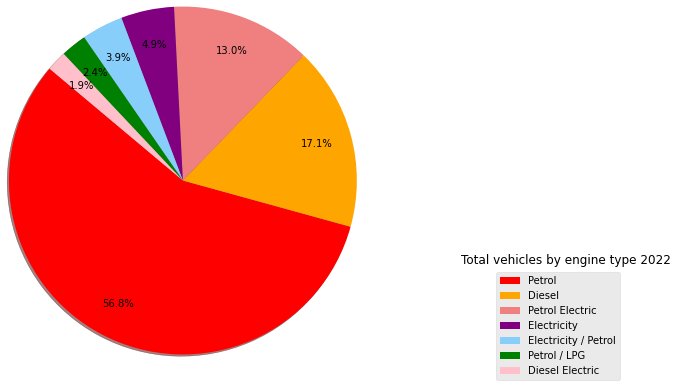

In [68]:
#Plotting a pie chart based on the fuel type popularity in 2022
colors3 = ["red","orange", "lightcoral","purple", "lightskyblue", "green", "pink",]
counts4 = Filtered_df_2022["Fuel Type"].value_counts()
plt.pie(counts4.values, explode=None, colors=colors3, autopct='%1.1f%%', shadow=True, startangle=140, radius=2, pctdistance = 0.8)

plt.style.use("ggplot")
plt.legend(bbox_to_anchor= (1.02,1), loc="upper left", borderaxespad=20,labels=counts4.index.values )
plt.suptitle('Total vehicles by engine type 2022', x= 1.4, y=0.25)

plt.savefig(fname="images/pie chart 2022")

# What does this show us?



In the year 2021 hybrid fuel type, petrol electric, massively increased in usage, becoming the second most popular fuel type after petrol. Purely electric fuel type started gaining more popularity, in the same year, however is still remains one of the least used fuel types.

In [16]:
# show all columns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)


## API

In [17]:
list_of_modes = ['dieselCar', 'petrolCar', 'taxi', 'motorbike', 'bus', 'transitRail', 'economyFlight', 'businessFlight', 'firstclassFlight', 'anyFlight' ]          
list_of_fuels = ['diesel', 'motorGasoline', 'motorGasoline', 'motorGasoline', 'diesel', 'diesel', 'jetFuel', 'jetFuel','jetFuel', 'aviationGasoline']


In [18]:
def carbon_emission(type_list, fuel_list):
    """enter mode of transportation list and associated fuel type to calculate carbon emissions for round trip travel from new york to slc"""
    carbon_footprint = []
    carbon_dict = {}
    for x, y in zip(type_list, fuel_list):
        activity = 3910
        type_ = 'miles'
        mode = 'petrolCar'
        country = 'def'
        url = f'https://api.triptocarbon.xyz/v1/footprint?activity={activity}&activityType={type_}&country={country}&mode={x}&fueltype={y}'
        response = requests.get(url)
        info = response.json()
        carbon = str(list(info.values()))
        carbon_footprint.append({x : carbon.strip("['']")})
    for d in carbon_footprint: 
        carbon_dict.update(d)
    return carbon_dict 

In [19]:
carbon_footprint = {}
carbon_footprint = carbon_emission(list_of_modes, list_of_fuels)
carbon_footprint

{'dieselCar': '1759.50',
 'petrolCar': '1493.62',
 'taxi': '899.30',
 'motorbike': '782.00',
 'bus': '418.37',
 'transitRail': '637.33',
 'economyFlight': '547.40',
 'businessFlight': '1180.82',
 'firstclassFlight': '1470.16',
 'anyFlight': '723.35'}

In [20]:
carbon_emission_world = pd.DataFrame(list(carbon_footprint.items()))

In [21]:
carbon_emission_world.rename(columns = {0 :'Type of Transport'}, inplace = True)
carbon_emission_world.rename(columns = {1 :'Carbon_Footprint'}, inplace = True)
carbon_emission_world['Carbon_Footprint'] = carbon_emission_world['Carbon_Footprint'].astype('float64')
carbon_emission_world

Type of Transport  Carbon_Footprint
0         dieselCar           1759.50
1         petrolCar           1493.62
2              taxi            899.30
3         motorbike            782.00
4               bus            418.37
5       transitRail            637.33
6     economyFlight            547.40
7    businessFlight           1180.82
8  firstclassFlight           1470.16
9         anyFlight            723.35

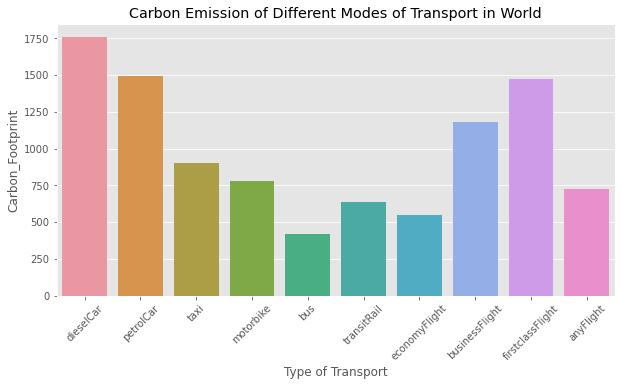

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x=carbon_emission_world['Type of Transport'], y=carbon_emission_world['Carbon_Footprint'])
plt.xticks(rotation=45)
plt.title('Carbon Emission of Different Modes of Transport in World')

plt.savefig(fname="images/bar chart of global carbon emissions.png")

In [23]:
emission_fueltype = euro_df.loc[:, ['Fuel Type','Cleaned CO2', 'THC + NOx Emissions [mg/km]', 'Date of change']]
emission_fueltype["Date of change"] = pd.to_datetime(emission_fueltype["Date of change"]).dt.strftime('%Y')
emission_fueltype.head()
#emission_date.dtypes

Fuel Type  Cleaned CO2  THC + NOx Emissions [mg/km] Date of change
0    Petrol        161.0                         59.0           2022
1    Petrol        153.0                         59.0           2022
2    Petrol        169.0                         79.0           2020
3    Petrol        162.0                         79.0           2020
4    Petrol        169.0                         79.0           2021

In [24]:
emission_fuelrename = emission_fueltype.rename(columns={"Cleaned CO2": "CO2 Emissions [mg/km]", "Date of change": "Year"})
emission_fuelrename.head()

Fuel Type  CO2 Emissions [mg/km]  THC + NOx Emissions [mg/km]  Year
0    Petrol                  161.0                         59.0  2022
1    Petrol                  153.0                         59.0  2022
2    Petrol                  169.0                         79.0  2020
3    Petrol                  162.0                         79.0  2020
4    Petrol                  169.0                         79.0  2021

In [25]:
emission_fuel_groupby = emission_fuelrename.groupby(['Year', 'Fuel Type'], as_index=False)
emission_summary_fuel = emission_fuel_groupby.mean()
emission_summary_fuel.head()

Year        Fuel Type  CO2 Emissions [mg/km]  THC + NOx Emissions [mg/km]
0  2019           Diesel             154.400000                    80.825000
1  2019           Petrol             158.827160                    42.604938
2  2019  Petrol Electric             116.333333                    26.000000
3  2020           Diesel             180.593137                    55.869281
4  2020  Diesel Electric             114.868852                    67.147541

C:\Users\David\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

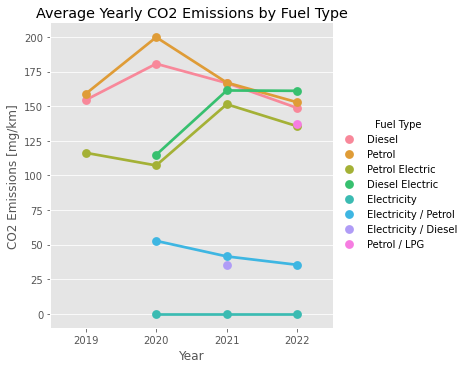

In [26]:
#ploting a line graph of Average CO2 Emissions by Powertrain 
plt.figure(figsize=(10,10))
sns.factorplot(data=emission_summary_fuel, x="Year", y="CO2 Emissions [mg/km]", hue="Fuel Type")
plt.title('Average Yearly CO2 Emissions by Fuel Type')

plt.savefig(fname="images/time series of CO2.png")

C:\Users\David\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

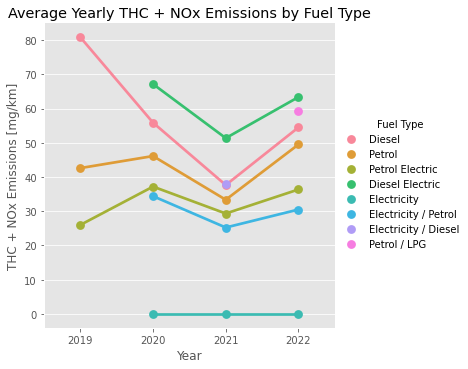

In [27]:
#ploting a line graph of Average THC + NOx Emissions by Powertrain 
plt.figure(figsize=(10,10))
sns.factorplot(data=emission_summary_fuel, x="Year", y="THC + NOx Emissions [mg/km]", hue="Fuel Type")
plt.title('Average Yearly THC + NOx Emissions by Fuel Type')
plt.savefig(fname="images/time series of THC and NOx.png")

# What does this tell us?
To further collaborate our initial observations, Diesel and Petrol cars are shown to give off the highest year on year emissions.

On the flip side, the lowest emissions were observed to be coming from electric cars yearly.

 Worthy of mention also is the fact that NOx emissions, which research has shown to be more harmful than Co2 are on the rise  https://www.cbc.ca/news/science/nitrous-oxide-climate-1.5753907.

In [28]:
euro_emissions = euro_df.groupby(['Manufacturer', 'Model', 'Description'], as_index=False).mean()
euro_emissions

Manufacturer       Model  \
0          ABARTH         595   
1          ABARTH         595   
2          ABARTH         595   
3          ABARTH         595   
4          ABARTH         595   
...           ...         ...   
3720        VOLVO  XC90, MY22   
3721        VOLVO  XC90, MY22   
3722        VOLVO  XC90, MY22   
3723        VOLVO  XC90, MY22   
3724        VOLVO  XC90, MY22   

                                            Description  Engine Capacity  \
0                                       1.4 TJET 145bhp           1368.0   
1                                       595 1.4 145 BHP           1368.0   
2                                      595 1.4 145 BHP            1368.0   
3                           595 1.4 145 BHP Convertible           1368.0   
4                                  595 1.4 TJET 145 BHP           1368.0   
...                                                 ...              ...   
3720             Recharge T8 Plug-in Hybrid Inscription           1969.0   
3721  Recharge T8 Plug-in Hybrid Inscription Expression           1969.0   
3722         Recharge T8 Plug-in Hybrid Inscription Pro           1969.0   
3723                Recharge T8 Plug-in Hybrid R-Design           1969.0   
3724            Recharge T8 Plug-in Hybrid R-Design Pro           1969.0   

      Engine Power (PS)  Engine Power (Kw)  \
0                 145.0              107.0   
1                 145.0              107.0   
2                 145.0              107.0   
3                 145.0              107.0   
4                 145.0              107.0   
...                 ...                ...   
3720              390.0              288.0   
3721              390.0              288.0   
3722              390.0              288.0   
3723              390.0              288.0   
3724              390.0              288.0   

      Electric energy consumption Miles/kWh  wh/km  Maximum range (Km)  \
0                                       0.0    NaN                 NaN   
1                                       0.0    NaN                 NaN   
2                                       0.0    NaN                 NaN   
3                                       0.0    NaN                 NaN   
4                                       0.0    NaN                 NaN   
...                                     ...    ...                 ...   
3720                                    2.4  254.0                50.0   
3721                                    2.4  254.0                50.0   
3722                                    2.4  254.0                50.0   
3723                                    2.4  254.0                50.0   
3724                                    2.5  241.0                46.0   

      Maximum range (Miles)  Diesel VED Supplement  WLTP Imperial Low  \
0                       NaN                    0.0               29.4   
1                       NaN                    0.0               27.4   
2                       NaN                    0.0               27.2   
3                       NaN                    0.0               27.3   
4                       NaN                    0.0               27.4   
...                     ...                    ...                ...   
3720                   31.0                    0.0                0.0   
3721                   31.0                    0.0                0.0   
3722                   31.0                    0.0                0.0   
3723                   31.0                    0.0                0.0   
3724                   29.0                    0.0                0.0   

      WLTP Imperial Medium  WLTP Imperial High  WLTP Imperial Extra High  \
0                     44.9                47.5                     39.30   
1                     42.2                47.1                     38.70   
2                     42.8                43.4                     34.40   
3                     42.5                45.3                     36.55

In [29]:
#calculate mean emissions

manu_emissions = euro_df.groupby(['Manufacturer'], as_index=False).mean().sort_values(by='Cleaned CO2')
manu_emissions = manu_emissions[['Manufacturer', 'Cleaned CO2']]
manu_emissions=manu_emissions.rename(columns={"Cleaned CO2": "mean Cleaned CO2"})


#calculate standard deviation of emissions

dev_emissions = euro_df.groupby(['Manufacturer'], as_index=False).std()
dev_emissions = dev_emissions[['Manufacturer', 'Cleaned CO2']]

dev_emissions=dev_emissions.rename(columns={"Cleaned CO2": "SD Cleaned CO2"})

#merge the two to produce a comprehenisve data set for the bar chart
manu_emissions  = pd.merge(manu_emissions,dev_emissions,how="inner",on="Manufacturer")

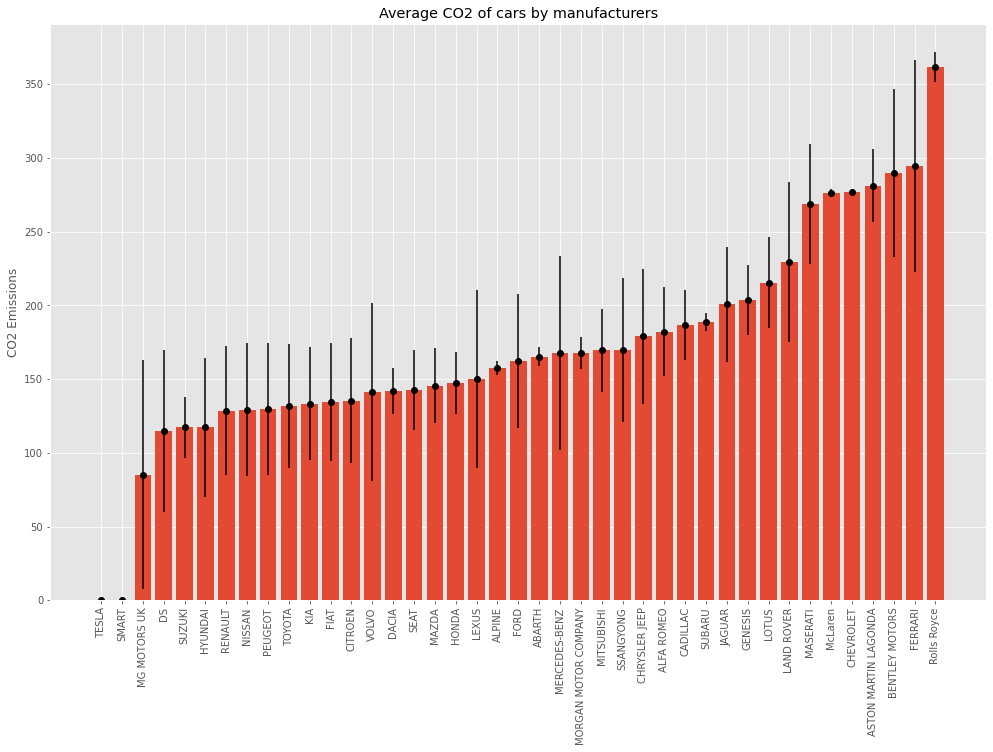

In [30]:


# Generate a bar chart to illustrate the average CO2 emissions for each car manufacturer.
#include error bars to represent standard deviation.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(manu_emissions["Manufacturer"],manu_emissions["mean Cleaned CO2"])

plt.errorbar(manu_emissions["Manufacturer"], manu_emissions["mean Cleaned CO2"], yerr=manu_emissions["SD Cleaned CO2"], fmt="o", color="0")

ax.set_ylabel('CO2 Emissions')
ax.set_title('Average CO2 of cars by manufacturers')
plt.xticks(manu_emissions["Manufacturer"], rotation='vertical')

fig.set_figheight(8)
fig.set_figwidth(13)

plt.savefig(fname="images/mean emissions by manufacturer.png")

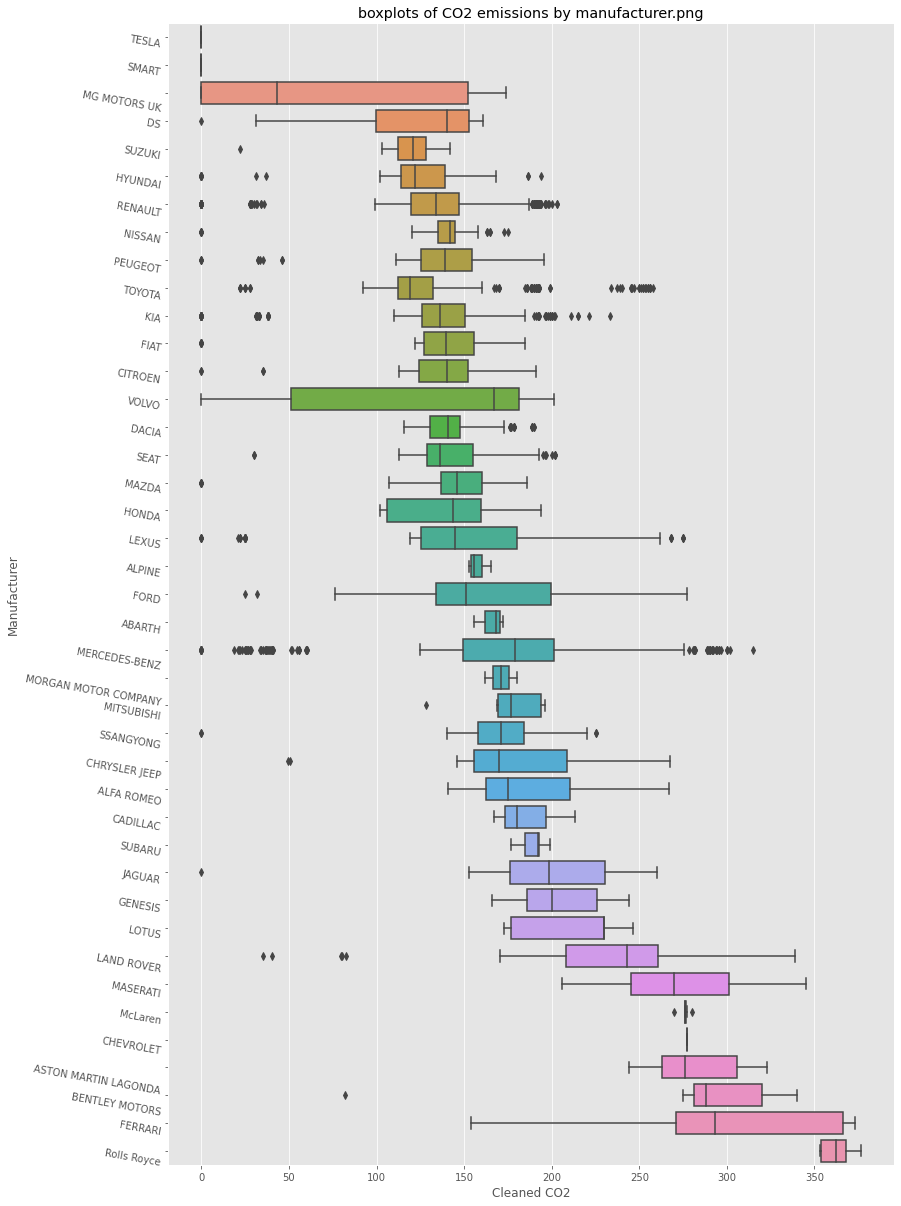

In [31]:
# Generate a box plot for each car manufacturer, of the CO2 emissions of their various vehicles.
plt.figure(figsize=(13,21))
ax = sns.boxplot(data=euro_emissions, y="Manufacturer", order=manu_emissions["Manufacturer"], x="Cleaned CO2")
plt.yticks(rotation=-10)
ax.set_title("boxplots of CO2 emissions by manufacturer.png")

plt.savefig(fname="images/boxplots of CO2 emissions by manufacturer.png")

# So...
Both of these diagrams show that most manufacturers produce vehicles with a wide variety of emissions. The overlap between manufacturers is larger than the differences between them.


Cars with low or zero emissions are still mostly outliers, showing there is some choice for consumers, but very little compared to the large swathe of cars between 100-200 CO2.

In order for carbon emissions to come down, electric and hybrid cars will have to become the normal model of production, not an outlier.


# How powerful are clean vehicles?

In [32]:
emmisionsdata_df = pd.read_csv('data/Euro_6_CLEAN.csv', encoding = 'cp1252')
emmisionsdata_df.tail(5)

Manufacturer       Model                                 Description  \
6329        VOLVO  XC90, MY22  Recharge T8 Plug-in Hybrid Inscription Pro   
6330        VOLVO  XC90, MY22         Recharge T8 Plug-in Hybrid R-Design   
6331        VOLVO  XC90, MY22         Recharge T8 Plug-in Hybrid R-Design   
6332        VOLVO  XC90, MY22     Recharge T8 Plug-in Hybrid R-Design Pro   
6333        VOLVO  XC90, MY22     Recharge T8 Plug-in Hybrid R-Design Pro   

     Transmission Manual or Automatic  Engine Capacity             Fuel Type  \
6329       8A-AWD           Automatic           1969.0  Electricity / Petrol   
6330       8A-AWD           Automatic           1969.0  Electricity / Petrol   
6331       8A-AWD           Automatic           1969.0  Electricity / Petrol   
6332       8A-AWD           Automatic           1969.0  Electricity / Petrol   
6333       8A-AWD           Automatic           1969.0  Electricity / Petrol   

                                  Powertrain  Engine Power (PS)  \
6329  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   
6330  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   
6331  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   
6332  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   
6333  Plug-in Hybrid Electric Vehicle (PHEV)              390.0   

      Engine Power (Kw)  Electric energy consumption Miles/kWh  wh/km  \
6329              288.0                                    2.4  254.0   
6330              288.0                                    2.4  254.0   
6331              288.0                                    2.4  254.0   
6332              288.0                                    2.5  241.0   
6333              288.0                                    2.5  241.0   

      Maximum range (Km)  Maximum range (Miles) Euro Standard  \
6329                50.0                   31.0       Euro 6d   
6330                50.0                   31.0       Euro 6d   
6331                50.0                   31.0       Euro 6d   
6332                46.0                   29.0       Euro 6d   
6333                46.0                   29.0       Euro 6d   

      Diesel VED Supplement Testing Scheme  WLTP Imperial Low  \
6329                  False           WLTP                0.0   
6330                  False           WLTP                0.0   
6331                  False           WLTP                0.0   
6332                  False           WLTP                0.0   
6333                  False           WLTP                0.0   

      WLTP Imperial Medium  WLTP Imperial High  WLTP Imperial Extra High  \
6329                   0.0                 0.0                       0.0   
6330                   0.0                 0.0                       0.0   
6331                   0.0                 0.0                       0.0   
6332                   0.0                 0.0                       0.0   
6333                   0.0                 0.0                       0.0   

      WLTP Imperial Combined  WLTP Imperial Combined (Weighted)  \
6329                     0.0                               83.0   
6330                     0.0                              104.5   
6331                     0.0                               83.0   
6332                     0.0                              104.5   
6333                     0.0                               83.0   

      WLTP Metric Low  WLTP Metric Medium  WLTP Metric High  \
6329              0.0                 0.0               0.0   
6330              0.0                 0.0               0.0   
6331              0.0                 0.0               0.0   
6332              0.0                 0.0               0.0   
6333              0.0                 0.0               0.0   

      WLTP Metric Extra High  WLTP Metric Combined  \
6329                     0.0                   0.0   
6330                     0.0                   0.0   
6331                     0.0        

In [33]:
(emmisionsdata_df['Engine Capacity'] == 1969.0).value_counts()

False    6158
True      176
Name: Engine Capacity, dtype: int64

In [34]:
emmisionsdata_df.shape

(6334, 45)

# Local Data Cleanup

In [35]:
#The CSV file imported had cleaned data. 
#In this section additional data cleaning is done to remove some of the remaining errors

In [36]:
#removing rows where engine power = 0
cleandata_df = emmisionsdata_df.loc[emmisionsdata_df['Engine Power (Kw)'] >= 1]

In [37]:
cleandata_df['Engine Power (Kw)'] > 0

0       True
1       True
2       True
3       True
4       True
        ... 
6329    True
6330    True
6331    True
6332    True
6333    True
Name: Engine Power (Kw), Length: 6219, dtype: bool

In [38]:
emmisionsdata_df.shape

(6334, 45)

In [39]:
emmisionsdata_df['Powertrain'].unique()

array(['Internal Combustion Engine (ICE)',
       'Plug-in Hybrid Electric Vehicle (PHEV)',
       'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)',
       'Liquified Petroleum Gas (LPG)',
       'Mild Hybrid Electric Vehicle (MHEV)',
       'Hybrid Electric Vehicle (HEV)'], dtype=object)

# Plots

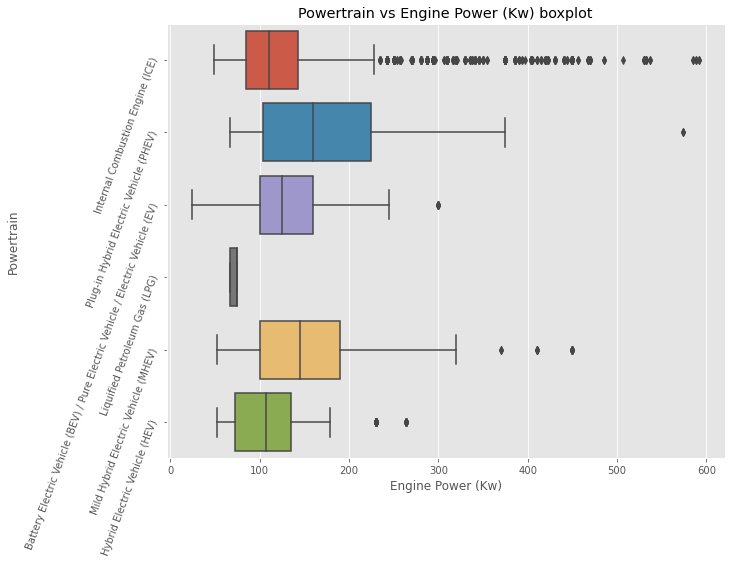

In [40]:
#boxplot to visualise the range of engine sizes based on on the Powertrain
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=cleandata_df, y="Powertrain", x="Engine Power (Kw)")
plt.yticks(rotation=70)
ax.set_title("Powertrain vs Engine Power (Kw) boxplot")

plt.savefig(fname="images/box plot of Powertrain.png")

# Observations
Internal combustion engines have a wide range of power output 

Smaller range of of engines for electric vehicles


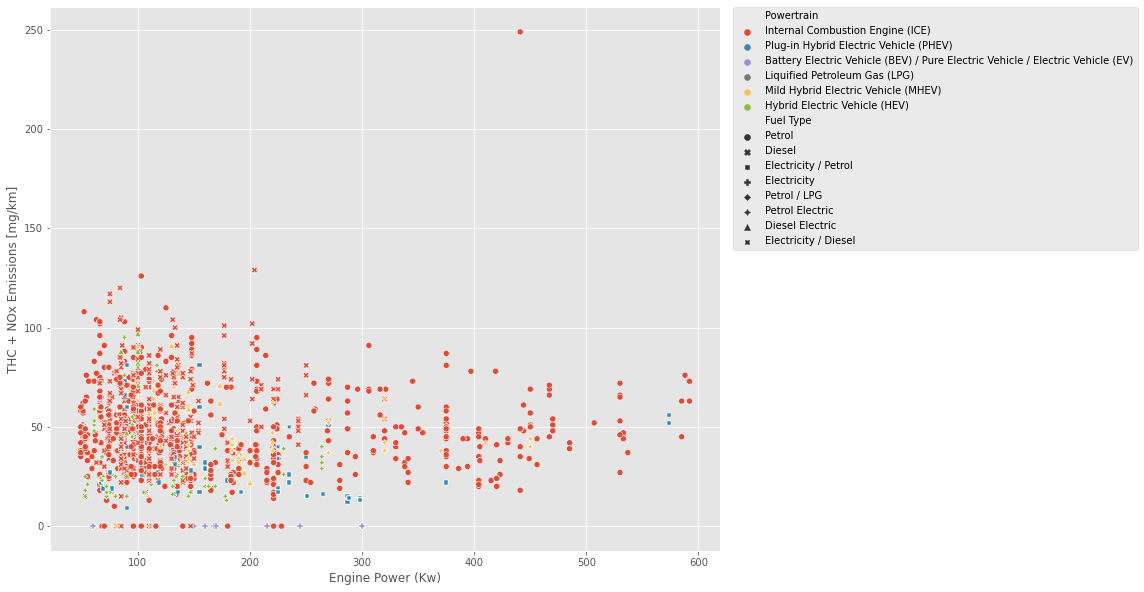

In [41]:


#Scatterplot to show effect of Engine size, Powertrain and Fuel type on NOx, THC emmisions
plt.figure(figsize=(12,10))
sns.scatterplot(data= cleandata_df, x='Engine Power (Kw)', 
                y='THC + NOx Emissions [mg/km]', hue='Powertrain', style = 'Fuel Type' )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title("Engine Power (Kw) vs THC + NOx Emissions [mg/km] scatterplot")

plt.savefig(fname="images/Scatterplot of engine power vs THC and NOx.png")



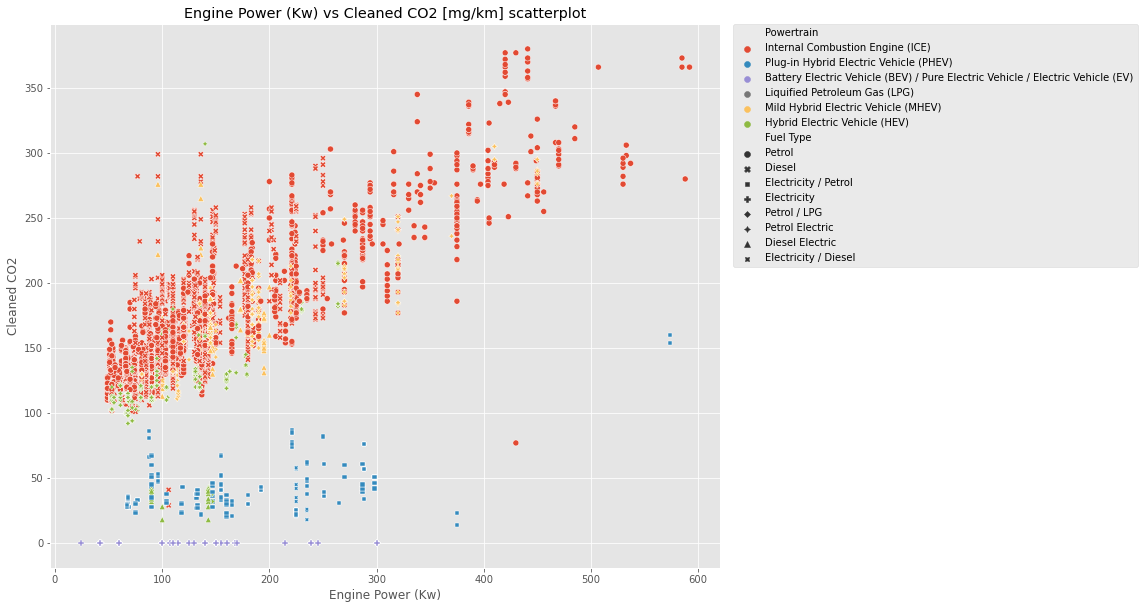

In [42]:


#Scatterplot to show effect of Engine size Powertrain and Fuel type on CO2 emmisions
plt.figure(figsize=(12,10))
ax = sns.scatterplot(data= cleandata_df, x='Engine Power (Kw)', 
                y='Cleaned CO2', hue='Powertrain', style = 'Fuel Type' )
ax.set_title = ax.set_title("Engine Power (Kw) vs Cleaned CO2 [mg/km] scatterplot")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig(fname="images/Scatterplot of engine power vs CO2.png")



No handles with labels found to put in legend.


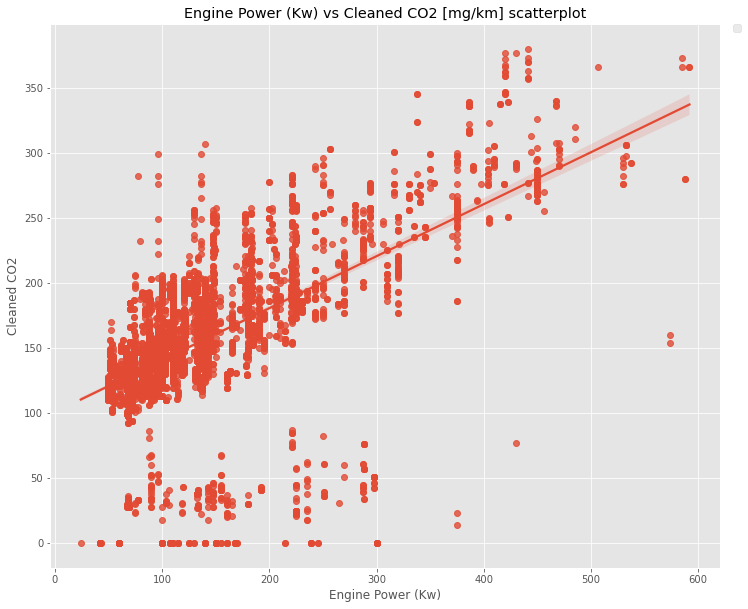

In [43]:


plt.figure(figsize=(12,10))
ax = sns.regplot(data= cleandata_df, x='Engine Power (Kw)', 
                y='Cleaned CO2')
ax.set_title = ax.set_title("Engine Power (Kw) vs Cleaned CO2 [mg/km] scatterplot")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig(fname="images/regression of engine power vs CO2.png")



# Observations
For electricity powered cars, CO2 emissions remain zero with increasing engine power
Electric cars with engines below 300 kw outperform other types of engines                        
If consumers continue to demand high-power cars, can cars with bigger electric engines be produced?


In [44]:
#Calculating mean emmisons based on the manufacturer
Manufacture_meandf = cleandata_df.groupby(['Manufacturer', 'Powertrain'], as_index=False)['Cleaned CO2'].mean()
Powertrain_meandf = pd.DataFrame(Manufacture_meandf)

In [45]:


Powertrain_meandf.head()



Manufacturer                        Powertrain  Cleaned CO2
0                ABARTH  Internal Combustion Engine (ICE)   165.333333
1            ALFA ROMEO  Internal Combustion Engine (ICE)   182.129412
2                ALPINE  Internal Combustion Engine (ICE)   157.437500
3  ASTON MARTIN LAGONDA  Internal Combustion Engine (ICE)   281.272727
4        BENTLEY MOTORS  Internal Combustion Engine (ICE)   302.411765

In [46]:
Powertrain_meandf

Manufacturer                                         Powertrain  \
0                 ABARTH                   Internal Combustion Engine (ICE)   
1             ALFA ROMEO                   Internal Combustion Engine (ICE)   
2                 ALPINE                   Internal Combustion Engine (ICE)   
3   ASTON MARTIN LAGONDA                   Internal Combustion Engine (ICE)   
4         BENTLEY MOTORS                   Internal Combustion Engine (ICE)   
5         BENTLEY MOTORS             Plug-in Hybrid Electric Vehicle (PHEV)   
6               CADILLAC                   Internal Combustion Engine (ICE)   
7              CHEVROLET                   Internal Combustion Engine (ICE)   
8          CHRYSLER JEEP                   Internal Combustion Engine (ICE)   
9          CHRYSLER JEEP             Plug-in Hybrid Electric Vehicle (PHEV)   
10               CITROEN  Battery Electric Vehicle (BEV) / Pure Electric...   
11               CITROEN                   Internal Combustion Engine (ICE)   
12               CITROEN             Plug-in Hybrid Electric Vehicle (PHEV)   
13                 DACIA                   Internal Combustion Engine (ICE)   
14                 DACIA                      Liquified Petroleum Gas (LPG)   
15                    DS                   Internal Combustion Engine (ICE)   
16                    DS             Plug-in Hybrid Electric Vehicle (PHEV)   
17               FERRARI                   Internal Combustion Engine (ICE)   
18               FERRARI             Plug-in Hybrid Electric Vehicle (PHEV)   
19                  FIAT  Battery Electric Vehicle (BEV) / Pure Electric...   
20                  FIAT                      Hybrid Electric Vehicle (HEV)   
21                  FIAT                   Internal Combustion Engine (ICE)   
22                  FIAT                Mild Hybrid Electric Vehicle (MHEV)   
23                  FORD                      Hybrid Electric Vehicle (HEV)   
24                  FORD                   Internal Combustion Engine (ICE)   
25                  FORD                Mild Hybrid Electric Vehicle (MHEV)   
26                  FORD             Plug-in Hybrid Electric Vehicle (PHEV)   
27               GENESIS                   Internal Combustion Engine (ICE)   
28                 HONDA                      Hybrid Electric Vehicle (HEV)   
29                 HONDA                   Internal Combustion Engine (ICE)   
30               HYUNDAI  Battery Electric Vehicle (BEV) / Pure Electric...   
31               HYUNDAI                      Hybrid Electric Vehicle (HEV)   
32               HYUNDAI                   Internal Combustion Engine (ICE)   
33               HYUNDAI                Mild Hybrid Electric Vehicle (MHEV)   
34               HYUNDAI             Plug-in Hybrid Electric Vehicle (PHEV)   
35                JAGUAR                   Internal Combustion Engine (ICE)   
36                   KIA  Battery Electric Vehicle (BEV) / Pure Electric...   
37                   KIA                      Hybrid Electric Vehicle (HEV)   
38                   KIA                   Internal Combustion Engine (ICE)   
39                   KIA                Mild Hybrid Electric Vehicle (MHEV)   
40                   KIA             Plug-in Hybrid Electric Vehicle (PHEV)   
41            LAND ROVER                      Hybrid Electric Vehicle (HEV)   
42            LAND ROVER                   Internal Combustion Engine (ICE)   
43            LAND ROVER             Plug-in Hybrid Electric Vehicle (PHEV)   
44                 LEXUS                      Hybrid Electric Vehicle (HEV)   
45                 LEXUS                   Internal Combustion Engine (ICE)   
46                 LEXUS             Plug-in Hybrid Electric Vehicle (PHEV)   
47                 LOTUS                   Internal Combustion Engine (ICE)   
48              MASERATI                   Internal Combustion Engine (ICE)   
49                 MAZDA  Battery Electric Vehicle (BEV) / Pur

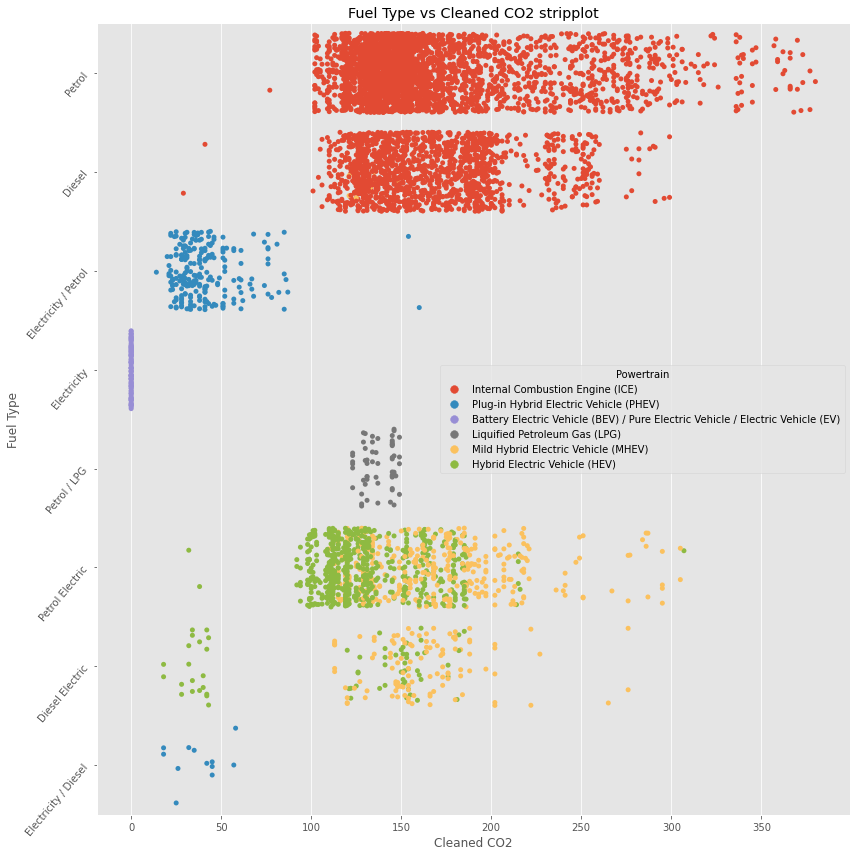

In [47]:


    #This plot and the one in the next cell are very similar. 
    #The difference is tha the one below is plotted WLTP CO2 vs Powertrain, 
    # whilst the one on the next slide Cleaned CO2 is used. 
    plt.figure(figsize=(12,12))
    plt.yticks(rotation=50)
    ax = sns.stripplot(data= cleandata_df, y='Fuel Type', 
                x='Cleaned CO2', jitter = 0.4, hue='Powertrain', 
                      )
    ax.set_title("Fuel Type vs Cleaned CO2 stripplot")
    plt.tight_layout()

    plt.savefig(fname="images/stripplot of emissions by fuel type - cleaned data.png")



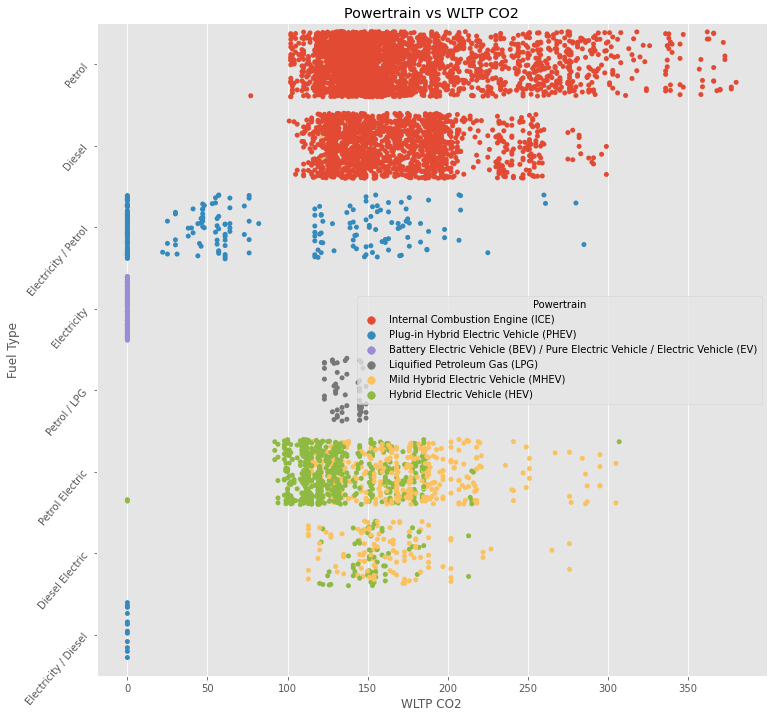

In [48]:
# compared with the plot above the data for the PHEV does not make sense because
# some PHEV enigines have more emissions than than ICE engines which was is not expected. 
# Therefore the CO2 data clean up is justfied as shown on the plot above 
plt.figure(figsize=(12,12))
plt.yticks(rotation=50)
ax = sns.stripplot(data= cleandata_df, y='Fuel Type', 
                x='WLTP CO2', jitter = 0.4, hue='Powertrain', 
                      )
ax.set_title("Powertrain vs WLTP CO2")
    
plt.savefig(fname="images/stripplot of emissions by fuel type - raw data.png")



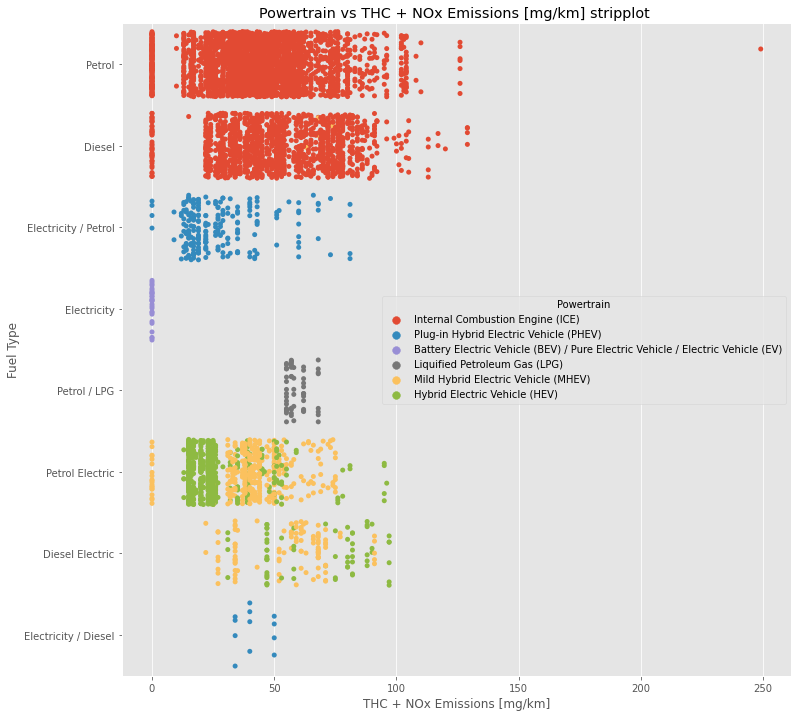

In [49]:
plt.figure(figsize=(12,12))
plt.yticks(rotation=0)
ax = sns.stripplot(data= cleandata_df, y='Fuel Type', 
                x='THC + NOx Emissions [mg/km]', jitter = 0.4, hue='Powertrain'
                      )
ax.set_title("Powertrain vs THC + NOx Emissions [mg/km] stripplot ")
plt.savefig(fname="images/stripplot of THC and NOx emissision by fuel type.png")

# Conclusions
Petrol and diesel powered internal combustion engines  can not produce less than ~ 100 mg/km CO2

This is the limit, any further reduction can only be done by switching to electric fuel type


In [50]:
#Scatter plots below have been plotted using plotly because it has a hover function which enables the model for 
#each data point to be determined

In [51]:
fig = px.strip(data_frame=cleandata_df, y="Cleaned CO2", x="Engine Power (Kw)", orientation="h",
               color="Fuel Type", facet_row=None, facet_col=None, hover_name= 'Model', width=None,
    height=None,log_y=False, title= 'WLTP CO2 vs Engine Power (Kw)')
fig.show()

In [52]:


fig2 = px.scatter(data_frame=cleandata_df, y="Cleaned CO2", x="Engine Power (Kw)", orientation="h",
               color="Fuel Type", facet_row=None, facet_col=None, hover_name= 'Model', width=None,
    height=None,log_y=False, trendline='ols', labels = 'trendline', title= 'CO2 emmisions vs Engine Power (Kw)')
fig2.show()



C:\Users\David\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning:

invalid value encountered in double_scalars



In [53]:


fig = px.scatter(data_frame=cleandata_df, y="THC + NOx Emissions [mg/km]", x="Engine Power (Kw)", orientation="h",
               color="Fuel Type", facet_row=None, facet_col=None,hover_data=None, hover_name= 'Model', width=None,
    height=None,log_y=True, labels = 'Powertrain', title= 'THC + NOx Emissions [mg/km] vs Engine Power (Kw)')
fig.show()
   



In [54]:


fig = px.strip(data_frame=cleandata_df, y="Emissions NOx [mg/km]", x="Engine Power (Kw)", orientation="h",
               color="Fuel Type", facet_row=None, facet_col=None,hover_data=None, hover_name= 'Model', width=None,
    height=None,log_y=None, range_y=None, title= 'Emissions NOx [mg/km] vs Engine Power (Kw)')
#fig.update_layout(yaxis_range=[0,250])
fig.show()

